## Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
temp_df = pd.read_csv(r"C:\Users\Acer\Downloads\duplicate_questions_pairs.xls")
temp_df.head()


# 0 not duplicate
# 1 duplicate

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
temp_df['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [7]:
# data explanation
# data preprocessing
# applying bow
# random forest and accuracy
# xgboost classifier

In [8]:
temp_df.shape

(404290, 6)

In [9]:
df = temp_df.iloc[:20000]
df.shape

(20000, 6)

In [10]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns=['id','qid1','qid2'], inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15028\1703882840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id','qid1','qid2'], inplace=True)


In [13]:
df.head(2)

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


# Data Preprocessing

In [14]:
from string import punctuation
from nltk.corpus import stopwords
stop = stopwords.words("english")
sw_list = list(punctuation) + stop

In [15]:
def text_cleaner(text):
    filtered_text = []
    from nltk.tokenize import word_tokenize
    tokenize = word_tokenize(text)
    for word in tokenize:
        if word.lower() not in sw_list:
            filtered_text.append(word)
    return " ".join(filtered_text)

In [16]:
df['question1'] = df['question1'].apply(text_cleaner)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15028\2370592804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question1'] = df['question1'].apply(text_cleaner)


In [17]:
df['question2'] = df['question2'].apply(text_cleaner)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15028\3885457803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question2'] = df['question2'].apply(text_cleaner)


# Data Visualization

In [18]:
df["is_duplicate"].value_counts()

is_duplicate
0    12526
1     7474
Name: count, dtype: int64

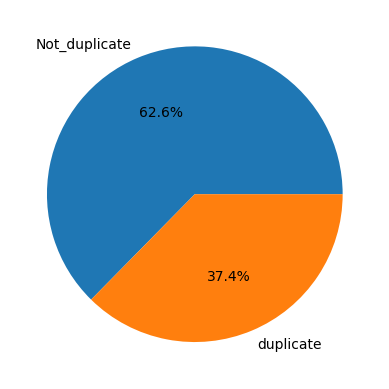

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['is_duplicate'].value_counts(), autopct='%1.1f%%', labels=['Not_duplicate','duplicate'])
plt.show()

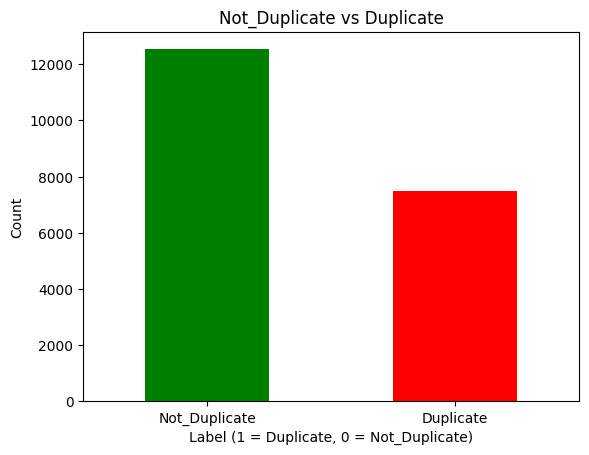

In [20]:
df['is_duplicate'].value_counts().plot(kind='bar', color=['green', 'red'],
                               title='Not_Duplicate vs Duplicate')
plt.xlabel('Label (1 = Duplicate, 0 = Not_Duplicate)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["Not_Duplicate", "Duplicate"], rotation=0)
plt.show()

In [21]:
df.head(2)

,question1,question2,is_duplicate
0,step step guide invest share market india,step step guide invest share market,0
1,story Kohinoor Koh-i-Noor Diamond,would happen Indian government stole Kohinoor ...,0


# Separating X and y, encoding & train_test_split

In [22]:
# separating
X = df.iloc[:,0:2]
y = df['is_duplicate']

In [23]:
X.head(2)

,question1,question2
0,step step guide invest share market india,step step guide invest share market
1,story Kohinoor Koh-i-Noor Diamond,would happen Indian government stole Kohinoor ...


In [24]:
y.head(1)

0    0
Name: is_duplicate, dtype: int64

In [25]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Feature Extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
# Combine question1 and question2 into a single text column for training
X_train_combined = X_train['question1'] + " " + X_train['question2']
X_test_combined = X_test['question1'] + " " + X_test['question2']

# Use a single CountVectorizer for the combined text
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train_combined)
X_test_bow = vectorizer.transform(X_test_combined)

# Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.69675


In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from xgboost import XGBClassifier

# Step 3: Model Building with XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_bow, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test_bow)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)


C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.698


# Prediction

In [30]:
def predict_duplicate(q1, q2):
    combined_text = q1 + " " + q2
    combined_vec = vectorizer.transform([combined_text])
    prediction = model.predict(combined_vec)
    return "Duplicate" if prediction[0] == 1 else "Not Duplicate"

In [31]:
q1 = "What is Machine Learning"
q2 = "What is NLP"
print(predict_duplicate(q1, q2))

Not Duplicate


In [32]:
q1 = "What is Machine Learning"
q2 = "What is Machine Learning"
print(predict_duplicate(q1, q2))

Not Duplicate


In [33]:
# alternate method

# using FeatueUnion & hstack

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the CountVectorizer for both question1 and question2
vectorizer_q1 = CountVectorizer()
vectorizer_q2 = CountVectorizer()

# Fit and transform on question1 and question2
X_q1 = vectorizer_q1.fit_transform(X_train['question1'])
X_q2 = vectorizer_q2.fit_transform(X_train['question2'])

# Concatenate the BoW representations of question1 and question2
from scipy.sparse import hstack
X_train_bow = hstack((X_q1, X_q2))

# Similarly, transform the test data
X_test_q1 = vectorizer_q1.transform(X_test['question1'])
X_test_q2 = vectorizer_q2.transform(X_test['question2'])
X_test_bow = hstack((X_test_q1, X_test_q2))

# Train a simple model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_bow, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict on user input
def predict_duplicate(q1, q2):
    q1_vec = vectorizer_q1.transform([q1])
    q2_vec = vectorizer_q2.transform([q2])
    combined_vec = hstack((q1_vec, q2_vec))
    prediction = model.predict(combined_vec)
    return "Duplicate" if prediction[0] == 1 else "Not Duplicate"

# Example usage
q1 = "What is the story of Kohinoor (Koh-i-Noor) Diamond?"
q2 = "What would happen if the Indian government stole Kohinoor?"
print(predict_duplicate(q1, q2))


Accuracy: 0.68625
Not Duplicate
